In [1]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../lightning_logs"))

In [2]:
from utils_result import get_loss,get_standardised_loss
from plot import plot_bar_vertical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import median_absolute_error
from utils_result import *
from scipy import stats
from plot import plot_bar_horizontal,plot_bar_vertical,vertical_boxplot,horizontal_boxplot,create_MAD_comparison_boxplot,create_MAD_comparison_violinplot

In [3]:
base_predictions = "../results/final_models/CONFIG=final_base,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=base/version_0/predictions/predict_loss=0.2406.csv"
pool_predictions = "../results/final_models/CONFIG=final_pool,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=pool/version_0/predictions/predict_loss=0.2330.csv"

In [4]:
df_pool = pd.read_csv(pool_predictions, index_col=0)
df_base = pd.read_csv(base_predictions, index_col=0)

In [22]:
def median_absolute_deviation(series, threshold=None):
    if threshold is not None and len(series) < threshold:
        return None
    return stats.median_abs_deviation(series.values)

# Looking at distributions difference truth and predictions

## With no comparison peptides

In [23]:
mad_predictions=df_pool.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x)).dropna()
mad_truth=df_pool.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x)).dropna()

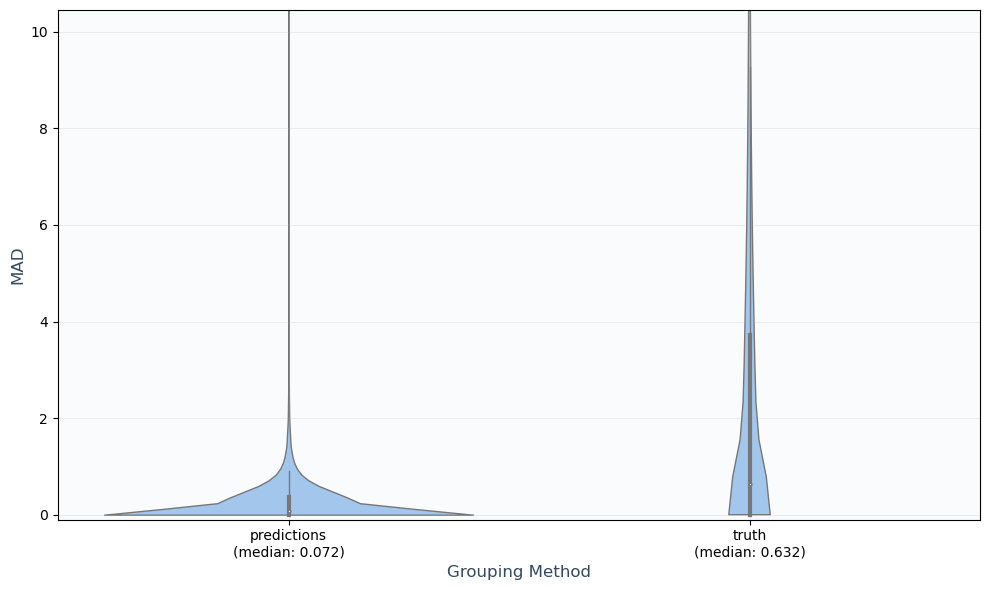

In [24]:
create_MAD_comparison_violinplot([mad_predictions,mad_truth],["predictions","truth"],title="",percentile_cutoff=0.95)

## Regular comparison

In [25]:
mad_predictions=df_pool.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_truth=df_pool.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

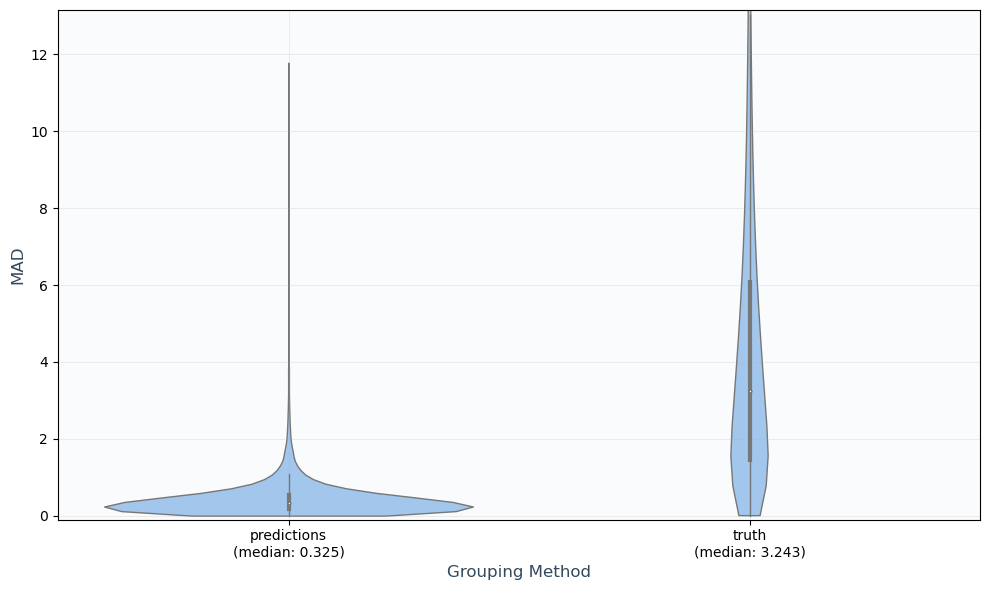

In [26]:
create_MAD_comparison_violinplot([mad_predictions,mad_truth],["predictions","truth"],title="",percentile_cutoff=0.95)

## Look for everything below 90th percentile

In [27]:
mad_truth = df_pool.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold = np.percentile(mad_truth, 90)
indices_90 =  mad_truth[mad_truth<=threshold].index
df_90 = df_pool[df_pool['modified_sequence'].isin(indices_90)]

In [28]:
mad_truth_90=df_90.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_prediction_90=df_90.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

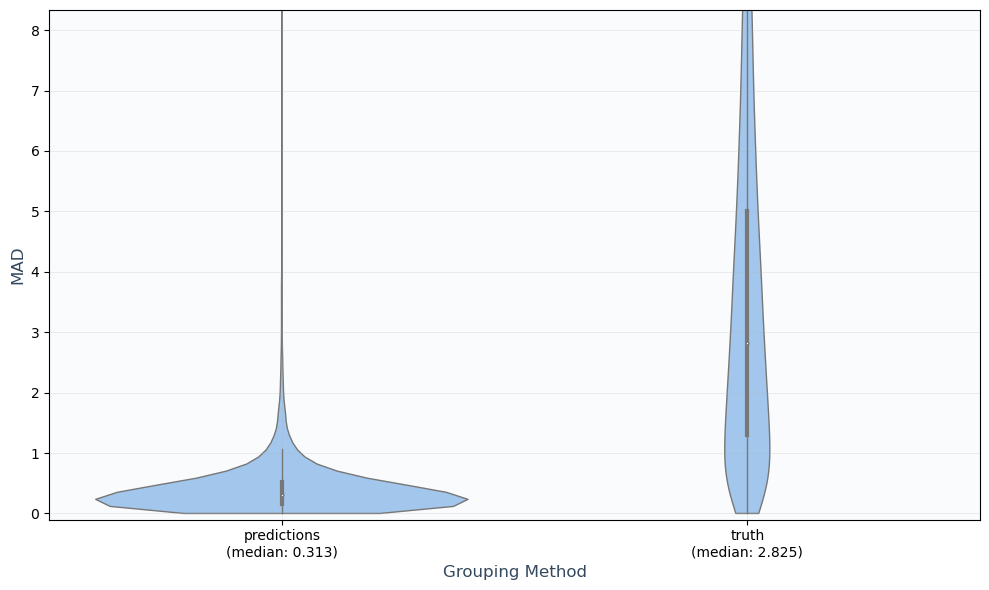

In [29]:
create_MAD_comparison_violinplot([mad_prediction_90,mad_truth_90],["predictions","truth"],percentile_cutoff=0.95)

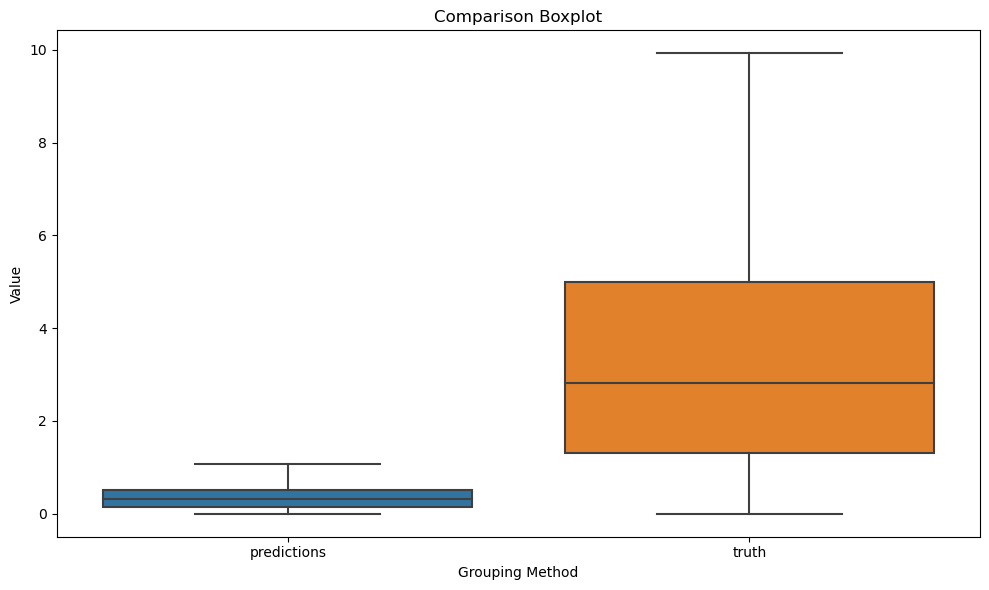

In [30]:
create_MAD_comparison_boxplot([mad_prediction_90,mad_truth_90],["predictions","truth"])

## Look for everything above 90th percentile

In [31]:
mad_truth = df_pool.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold = np.percentile(mad_truth, 90)
indices_10 =  mad_truth[mad_truth>=threshold].index
df_10 = df_pool[df_pool['modified_sequence'].isin(indices_10)]

In [32]:
mad_truth_10=df_10.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_prediction_10=df_10.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

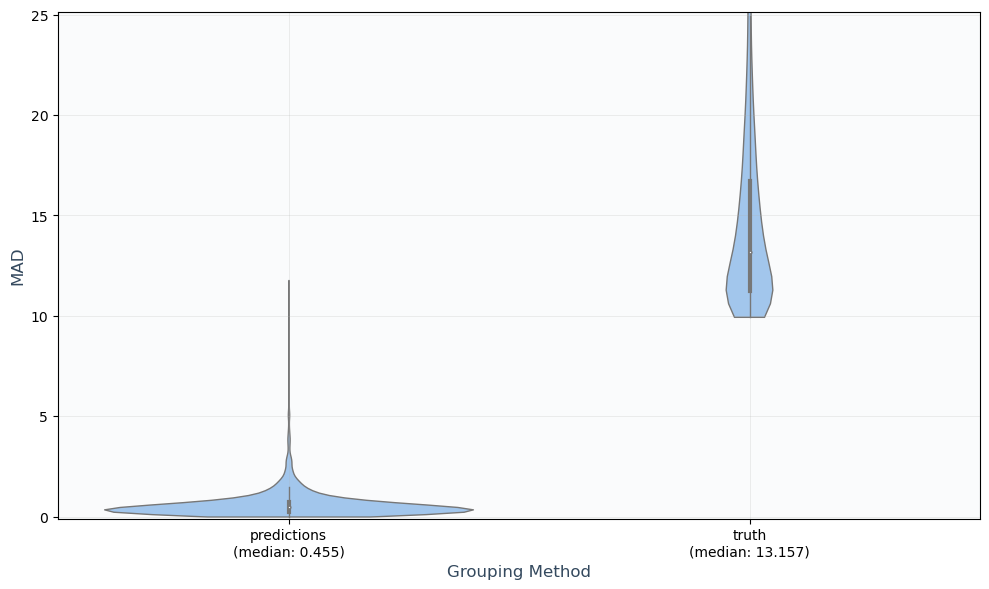

In [33]:
create_MAD_comparison_violinplot([mad_prediction_10,mad_truth_10],["predictions","truth"],percentile_cutoff=0.95)

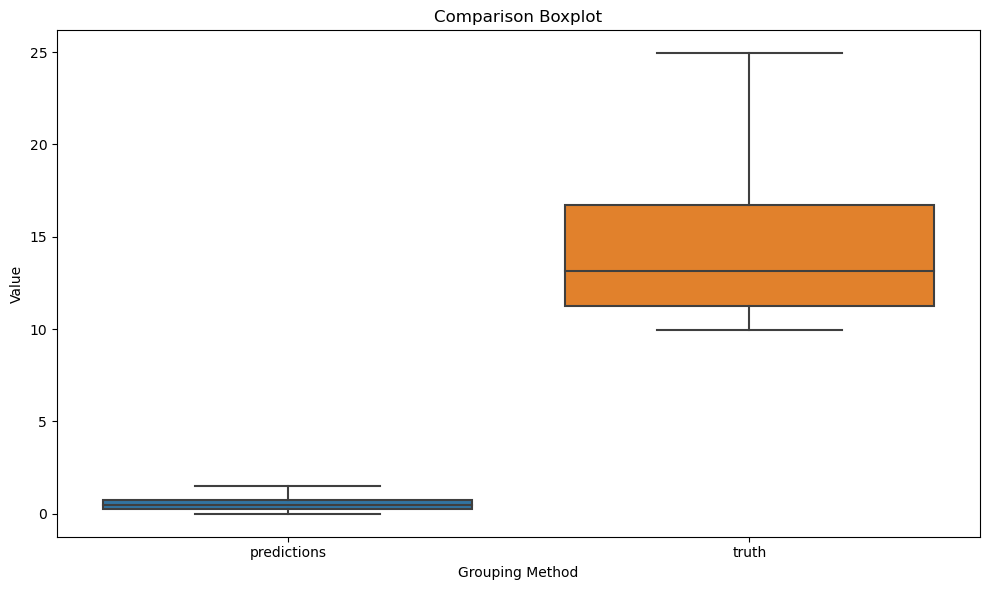

In [34]:
create_MAD_comparison_boxplot([mad_prediction_10,mad_truth_10],["predictions","truth"])

# checking if predictions go in the correct direction

In [5]:
difference = df_pool['predictions'] - df_base['predictions']

In [6]:
difference

0         10.631058
1          0.962087
2         -0.601304
3          2.741947
4          1.154504
            ...    
247339    -0.901956
247340    -1.575417
247341    -2.260904
247342    13.661631
247343    -0.354769
Name: predictions, Length: 247344, dtype: float64

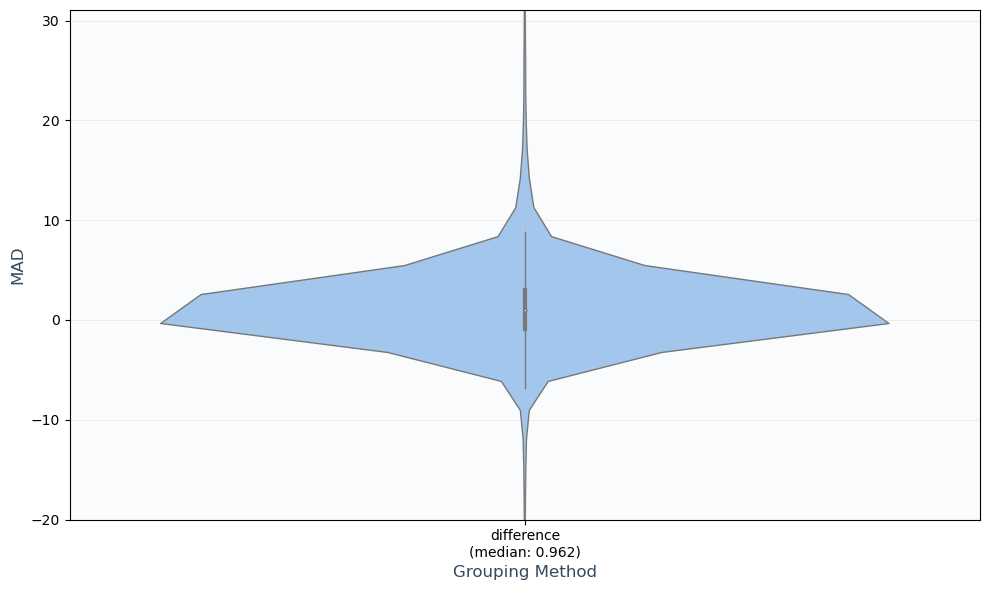

In [17]:
create_MAD_comparison_violinplot([difference],["difference"],lower=-20,percentile_cutoff=0.998)

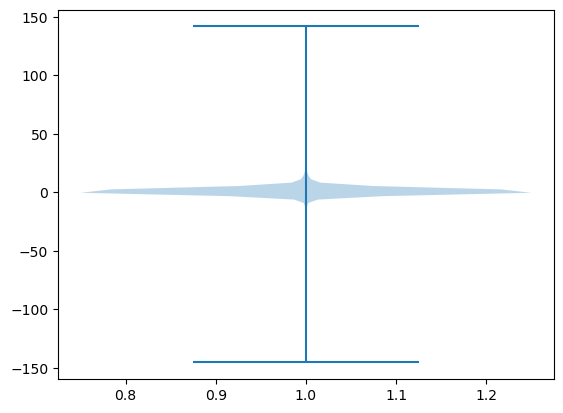

In [9]:
plt.violinplot(difference)
plt.show()